In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('BC_15.csv')
df

,area,length,width,length_width_ratio,major_axis_length,minor_axis_length,convex_area,perimeter,r_mean,g_mean,b_mean,rs,gs,bs,mean,std,uniformity,third_moment,class
0,12445.0,213,63,3.380952,248.045581,75.099740,13419.0,26721.026688,108.275693,158.328887,178.413339,10.405561,12.582881,13.357146,148.339306,42.406023,6.713844e+07,-2.897703e+09,BC-15
1,13375.0,217,74,2.932432,258.789616,89.962511,16058.0,31980.171509,101.863028,154.180785,176.323589,10.092722,12.416956,13.278689,144.122467,44.321719,7.882214e+07,-3.681922e+09,BC-15
2,12491.0,241,72,3.347222,295.968577,91.687166,17352.0,34570.430267,113.406373,158.763990,177.105436,10.649243,12.600158,13.308097,149.758600,40.596533,6.175844e+07,-3.155707e+09,BC-15
3,12982.0,225,78,2.884615,262.800021,96.887843,17550.0,34957.036484,112.717763,157.788862,176.952010,10.616862,12.561404,13.302331,149.152878,40.428765,6.365665e+07,-2.995841e+09,BC-15
4,13713.0,221,75,2.946667,261.496553,92.415045,16575.0,33012.280289,103.028367,155.102895,176.645665,10.150289,12.454031,13.290811,144.925642,43.672167,7.846270e+07,-3.647571e+09,BC-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,13154.0,209,65,3.215385,240.275876,76.104571,13585.0,27049.777832,105.628250,157.579291,170.217044,10.277561,12.553059,13.046725,144.474862,39.806431,6.252959e+07,-2.798376e+09,Negative
3672,9627.0,220,69,3.188406,276.025525,91.561954,15180.0,30232.469833,123.014750,163.936117,176.832347,11.091201,12.803754,13.297832,154.594405,37.957931,4.161187e+07,-2.564250e+09,Negative
3673,10538.0,209,80,2.612500,262.841822,111.412506,16720.0,33294.687653,116.462327,158.811539,173.095749,10.791771,12.602045,13.156586,149.456538,38.557244,4.699930e+07,-2.546508e+09,Negative
3674,7534.0,203,70,2.900000,272.147675,96.897026,14210.0,28291.630157,138.750597,168.757765,176.424210,11.779244,12.990680,13.282478,161.310857,30.211826,2.063008e+07,-1.133626e+09,Negative


In [3]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [5]:
# Standardize features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# KNN 


Text(0, 0.5, 'Accuracy Score')

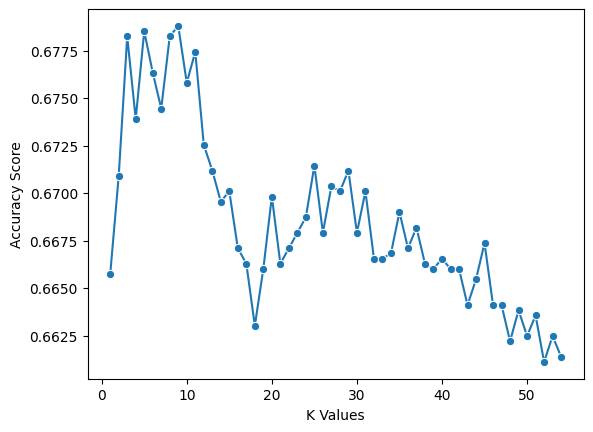

In [7]:
k_values = [i for i in range (1,55)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    #print(f'k={k} Mean Cross-Validation Score: {score}')
#plotting the result
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [8]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train_encoded)

y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8561643835616438
Recall: 0.6957328385899815
F1-score: 0.7676560900716479
Accuracy: 0.7941976427923844


# SVM


In [9]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly')  

# Train the SVM model
svm_classifier.fit(X_train_scaled, y_train_encoded)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8913043478260869
Recall: 0.608534322820037
F1-score: 0.7232635060639471
Accuracy: 0.772438803263826


# Random forecast

In [10]:
# grid_space={'random_state':[42,100,50,0],'max_depth':[3,5,10,None],
#               'n_estimators':[10,100,200],
#               'max_features':[1,3,5,7],
#               'min_samples_leaf':[1,2,3,4,5,20],
#               'min_samples_split':[1,2,3]
#            }
# rf = RandomForestClassifier()

# grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy')
# model_grid = grid.fit(X_train_scaled, y_train_encoded)

# print('Best hyperparameters are: '+str(model_grid.best_params_))
# print('Best score is: '+str(model_grid.best_score_))

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train_scaled, y_train_encoded)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8592436974789915
Recall: 0.7588126159554731
F1-score: 0.805911330049261
Accuracy: 0.8213961922030825
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       564
           1       0.86      0.76      0.81       539

    accuracy                           0.82      1103
   macro avg       0.83      0.82      0.82      1103
weighted avg       0.83      0.82      0.82      1103



# Extra Trees classifer


In [18]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)

# Train the Random Forest model
model.fit(X_train_scaled, y_train_encoded)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8604166666666667
Recall: 0.7662337662337663
F1-score: 0.8105986261040236
Accuracy: 0.8250226654578422


# Logictic LinearRegression

In [20]:
model = LogisticRegression(random_state = 42, max_iter =2000)

# Train the Random Forest model
model.fit(X_train_scaled, y_train_encoded)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8662674650698603
Recall: 0.8051948051948052
F1-score: 0.8346153846153846
Accuracy: 0.844061650045331


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadamireshraghi/blood-cell-cancer-all-4class")

print("Path to dataset files:", path)